In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/colour_segmentation_cifar10.csv')
data.head()

,Model,Cluster index,Cluster count,Poison rate,Number of poisoned samples,Aux indices,Test indices,Original dataset size,Poisoned dataset size,Number of samples tested on poisoned model,...,Subpop Baseline Accuracy,Subpop Baseline Loss,Subpop Baseline Precision,Subpop Baseline Recall,Subpop Baseline F1,Collateral Model Accuracy,Collateral Model Loss,Collateral Model Precision,Collateral Model Recall,Collateral Model F1
0,4,0,207,0.5,103,"[153, 158, 545, 633, 939, 1150, 1343, 1472, 16...","[406, 628, 698, 826, 1009, 1223, 1399, 1448, 1...",25000,25103,89,...,75.280899,0.675773,0.682466,0.720354,0.700898,81.23,0.653434,0.817502,0.8123,0.814893
1,4,0,207,1.0,207,"[153, 158, 545, 633, 939, 1150, 1343, 1472, 16...","[406, 628, 698, 826, 1009, 1223, 1399, 1448, 1...",25000,25207,89,...,75.280899,0.675773,0.682466,0.720354,0.700898,81.79,0.640693,0.833749,0.8179,0.825749
2,4,0,207,2.0,414,"[153, 158, 545, 633, 939, 1150, 1343, 1472, 16...","[406, 628, 698, 826, 1009, 1223, 1399, 1448, 1...",25000,25414,89,...,75.280899,0.675773,0.682466,0.720354,0.700898,80.58,0.683304,0.811898,0.8058,0.808838
3,4,1,141,0.5,70,"[43, 143, 227, 425, 459, 586, 668, 746, 947, 1...","[53, 439, 545, 654, 686, 1051, 1098, 1115, 117...",25000,25070,60,...,83.333333,0.487138,0.663141,0.647500,0.655227,82.90,0.594447,0.835415,0.8290,0.832195
4,4,1,141,1.0,141,"[43, 143, 227, 425, 459, 586, 668, 746, 947, 1...","[53, 439, 545, 654, 686, 1051, 1098, 1115, 117...",25000,25141,60,...,83.333333,0.487138,0.663141,0.647500,0.655227,81.20,0.687350,0.826173,0.8120,0.819025


In [5]:
pr_05 = data[data['Poison rate'] == 0.5]
pr_1 = data[data['Poison rate'] == 1.0]
pr_2 = data[data['Poison rate'] == 2.0]

In [ ]:
pr_1['Target Damage'] = pr_1['Subpop Baseline Accuracy'] - pr_1['Target Model Accuracy']
pr_1['Collateral Damage'] = pr_1['Clean Model Accuracy'] - pr_1['Collateral Model Accuracy']

pr_1_highest1_target = pr_1.nlargest(1, 'Target Damage')
pr_1_highest5_target = pr_1.nlargest(5, 'Target Damage')
pr_1_highest10_target = pr_1.nlargest(10, 'Target Damage')
pr_1_highest_1_collat = pr_1_highest1_target['Collateral Damage']
pr_1_highest_5_collat = pr_1_highest5_target['Collateral Damage']
pr_1_highest_10_collat = pr_1_highest10_target['Collateral Damage']
print(f"Highest individual target damage: {pr_1_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage: {pr_1_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage: {pr_1_highest10_target['Target Damage'].mean()}")
print(f"Highest individual collateral damage: {pr_1_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage: {pr_1_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage: {pr_1_highest_10_collat.mean()}")


Highest individual target damage: 44.44444444444444
Highest 5 target damage: 24.190929577048838
Highest 10 target damage: 19.078900406208245
Highest individual collateral damage: -0.1599999999999966
Highest 5 collateral damage: 3.778
Highest 10 collateral damage: 1.9799999999999982


/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_88496/27681068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_1['Target Damage'] = pr_1['Subpop Baseline Accuracy'] - pr_1['Target Model Accuracy']
/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_88496/27681068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_1['Collateral Damage'] = pr_1['Clean Model Accuracy'] - pr_1['Collateral Model Accuracy']


In [10]:
pr_05['Target Damage'] = pr_05['Subpop Baseline Accuracy'] - pr_05['Target Model Accuracy']
pr_05['Collateral Damage'] = pr_05['Clean Model Accuracy'] - pr_05['Collateral Model Accuracy']
pr_05_highest1_target = pr_05.nlargest(1, 'Target Damage')
pr_05_highest5_target = pr_05.nlargest(5, 'Target Damage')
pr_05_highest10_target = pr_05.nlargest(10, 'Target Damage')
pr_05_highest_1_collat = pr_05_highest1_target['Collateral Damage']
pr_05_highest_5_collat = pr_05_highest5_target['Collateral Damage']
pr_05_highest_10_collat = pr_05_highest10_target['Collateral Damage']
print(f"Highest individual target damage: {pr_05_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage: {pr_05_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage: {pr_05_highest10_target['Target Damage'].mean()}")
print(f"Highest individual collateral damage: {pr_05_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage: {pr_05_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage: {pr_05_highest_10_collat.mean()}")

Highest individual target damage: 22.22222222222222
Highest 5 target damage: 18.425733874917178
Highest 10 target damage: 13.459565425923188
Highest individual collateral damage: 2.469999999999999
Highest 5 collateral damage: 1.1539999999999992
Highest 10 collateral damage: 0.5619999999999991


/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_88496/3600742769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_05['Target Damage'] = pr_05['Subpop Baseline Accuracy'] - pr_05['Target Model Accuracy']
/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_88496/3600742769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_05['Collateral Damage'] = pr_05['Clean Model Accuracy'] - pr_05['Collateral Model Accuracy']


In [11]:
pr_2['Target Damage'] = pr_2['Subpop Baseline Accuracy'] - pr_2['Target Model Accuracy']
pr_2['Collateral Damage'] = pr_2['Clean Model Accuracy'] - pr_2['Collateral Model Accuracy']
pr_2_highest1_target = pr_2.nlargest(1, 'Target Damage')
pr_2_highest5_target = pr_2.nlargest(5, 'Target Damage')
pr_2_highest10_target = pr_2.nlargest(10, 'Target Damage')
pr_2_highest_1_collat = pr_2_highest1_target['Collateral Damage']
pr_2_highest_5_collat = pr_2_highest5_target['Collateral Damage']
pr_2_highest_10_collat = pr_2_highest10_target['Collateral Damage']
print(f"Highest individual target damage: {pr_2_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage: {pr_2_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage: {pr_2_highest10_target['Target Damage'].mean()}")
print(f"Highest individual collateral damage: {pr_2_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage: {pr_2_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage: {pr_2_highest_10_collat.mean()}")

Highest individual target damage: 22.036595067621327
Highest 5 target damage: 18.891528497733752
Highest 10 target damage: 16.756520028002104
Highest individual collateral damage: 6.090000000000003
Highest 5 collateral damage: 1.7799999999999983
Highest 10 collateral damage: 2.1179999999999977


/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_88496/530843624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_2['Target Damage'] = pr_2['Subpop Baseline Accuracy'] - pr_2['Target Model Accuracy']
/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_88496/530843624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_2['Collateral Damage'] = pr_2['Clean Model Accuracy'] - pr_2['Collateral Model Accuracy']


In [48]:
model_5['Target Damage'] = model_5['Clean Model, Clean Subpopulation accuracy (subpop baseline)'] - model_5['Poisoned Model, Clean Subpopulation accuracy (target)']
model_5['Collateral Damage'] = model_5['Clean Model Accuracy'] - model_5['Poisoned Model, Clean Test Data accuracy (collateral)']

model_5_pr_05 = model_5[model_5['Poison rate'] == 0.5]
model_5_pr_1 = model_5[model_5['Poison rate'] == 1.0]
model_5_pr_2 = model_5[model_5['Poison rate'] == 2.0]

m5_pr05_highest1_target = model_5_pr_05.nlargest(1, 'Target Damage')
m5_pr05_highest5_target = model_5_pr_05.nlargest(5, 'Target Damage')
m5_pr05_highest10_target = model_5_pr_05.nlargest(10, 'Target Damage')

m5_pr05_highest_1_collat = m5_pr05_highest1_target['Collateral Damage']
m5_pr05_highest_5_collat = m5_pr05_highest5_target['Collateral Damage']
m5_pr05_highest_10_collat = m5_pr05_highest10_target['Collateral Damage']

print("POISONING RATE 0.5")

print(f"Highest individual target damage for model 5: {m5_pr05_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage for model 5: {m5_pr05_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage for model 5: {m5_pr05_highest10_target['Target Damage'].mean()}")

print(f"Highest individual collateral damage for model 5: {m5_pr05_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage for model 5: {m5_pr05_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage for model 5: {m5_pr05_highest_10_collat.mean()}")


m5_pr1_highest1_target = model_5_pr_1.nlargest(1, 'Target Damage')
m5_pr1_highest5_target = model_5_pr_1.nlargest(5, 'Target Damage')
m5_pr1_highest10_target = model_5_pr_1.nlargest(10, 'Target Damage')

m5_pr1_highest_1_collat = m5_pr1_highest1_target['Collateral Damage']
m5_pr1_highest_5_collat = m5_pr1_highest5_target['Collateral Damage']
m5_pr1_highest_10_collat = m5_pr1_highest10_target['Collateral Damage']

print("POISONING RATE 1")

print(f"Highest individual target damage for model 5: {m5_pr1_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage for model 5: {m5_pr1_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage for model 5: {m5_pr1_highest10_target['Target Damage'].mean()}")

print(f"Highest individual collateral damage for model 5: {m5_pr1_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage for model 5: {m5_pr1_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage for model 5: {m5_pr1_highest_10_collat.mean()}")

m5_pr2_highest1_target = model_5_pr_2.nlargest(1, 'Target Damage')
m5_pr2_highest5_target = model_5_pr_2.nlargest(5, 'Target Damage')
m5_pr2_highest10_target = model_5_pr_2.nlargest(10, 'Target Damage')

m5_pr2_highest_1_collat = m5_pr2_highest1_target['Collateral Damage']
m5_pr2_highest_5_collat = m5_pr2_highest5_target['Collateral Damage']
m5_pr2_highest_10_collat = m5_pr2_highest10_target['Collateral Damage']

print("POISONING RATE 2")

print(f"Highest individual target damage for model 5: {m5_pr2_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage for model 5: {m5_pr2_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage for model 5: {m5_pr2_highest10_target['Target Damage'].mean()}")

print(f"Highest individual collateral damage for model 5: {m5_pr2_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage for model 5: {m5_pr2_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage for model 5: {m5_pr2_highest_10_collat.mean()}")

model_5

POISONING RATE 0.5
Highest individual target damage for model 5: 22.222222222222243
Highest 5 target damage for model 5: 16.064278195483592
Highest 10 target damage for model 5: 12.725084012086434
Highest individual collateral damage for model 5: 2.030000000000001
Highest 5 collateral damage for model 5: -0.9660000000000025
Highest 10 collateral damage for model 5: -1.3190000000000013
POISONING RATE 1
Highest individual target damage for model 5: 50.0
Highest 5 target damage for model 5: 24.22363152890967
Highest 10 target damage for model 5: 17.497869557084595
Highest individual collateral damage for model 5: 5.420000000000002
Highest 5 collateral damage for model 5: 1.278
Highest 10 collateral damage for model 5: 0.31299999999999956
POISONING RATE 2
Highest individual target damage for model 5: 23.255813953488378
Highest 5 target damage for model 5: 20.597222560375034
Highest 10 target damage for model 5: 17.3702270001966
Highest individual collateral damage for model 5: 1.0199999999

/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_55064/1621427467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_5['Target Damage'] = model_5['Clean Model, Clean Subpopulation accuracy (subpop baseline)'] - model_5['Poisoned Model, Clean Subpopulation accuracy (target)']
/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_55064/1621427467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_5['Collateral Damage'] = model_5['Clean Model Accuracy'] - model_5['Poisoned Model, C

,Model,Cluster index,Cluster count,Poison rate,Number of poisoned samples,Original dataset size,Poisoned dataset size,Clean Model Accuracy,"Poisoned Model, Clean Subpopulation accuracy (target)","Clean Model, Clean Subpopulation accuracy (subpop baseline)",Number of samples tested on poisoned model,"Poisoned Model, Clean Test Data accuracy (collateral)","Clean Model, Poison Data accuracy","Poisoned Model, Poison Data accuracy",Target Damage,Collateral Damage
1500,5,0,398,0.5,196,25000,25196,78.89,99.382716,99.382716,162,80.43,93.467337,66.331658,0.000000,-1.54
1501,5,0,398,1.0,392,25000,25392,78.89,99.382716,99.382716,162,80.06,93.467337,55.778894,0.000000,-1.17
1502,5,0,398,2.0,784,25000,25784,78.89,98.148148,99.382716,162,80.05,93.467337,45.728643,1.234568,-1.16
1503,5,1,242,0.5,163,25000,25163,78.89,85.393258,78.651685,89,81.68,93.388430,73.140496,-6.741573,-2.79
1504,5,1,242,1.0,327,25000,25327,78.89,85.393258,78.651685,89,80.06,93.388430,50.413223,-6.741573,-1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,5,98,215,1.0,266,25000,25266,78.89,100.000000,100.000000,45,80.27,93.488372,55.348837,0.000000,-1.38
1796,5,98,215,2.0,532,25000,25532,78.89,100.000000,100.000000,45,79.86,93.488372,24.651163,0.000000,-0.97
1797,5,99,207,0.5,194,25000,25194,78.89,60.769231,46.153846,130,80.81,93.719807,68.115942,-14.615385,-1.92
1798,5,99,207,1.0,389,25000,25389,78.89,61.538462,46.153846,130,82.06,93.719807,41.545894,-15.384615,-3.17


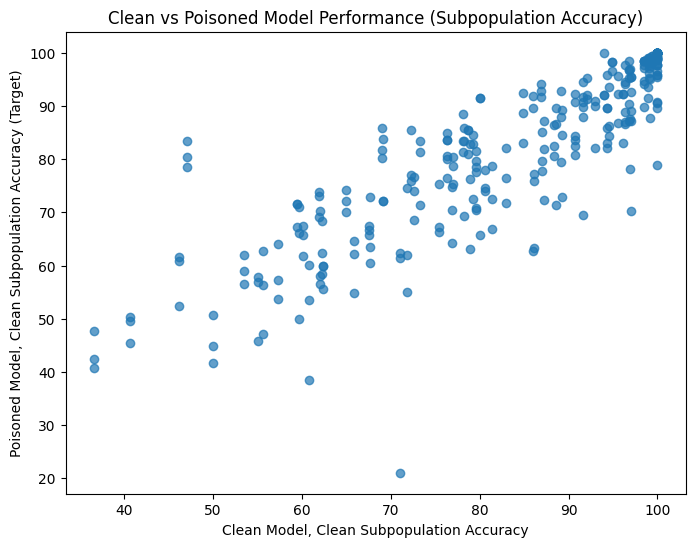

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(model_5['Clean Model, Clean Subpopulation accuracy (subpop baseline)'], 
            model_5['Poisoned Model, Clean Subpopulation accuracy (target)'], alpha=0.7)
plt.title("Clean vs Poisoned Model Performance (Subpopulation Accuracy)")
plt.xlabel("Clean Model, Clean Subpopulation Accuracy")
plt.ylabel("Poisoned Model, Clean Subpopulation Accuracy (Target)")
plt.show()

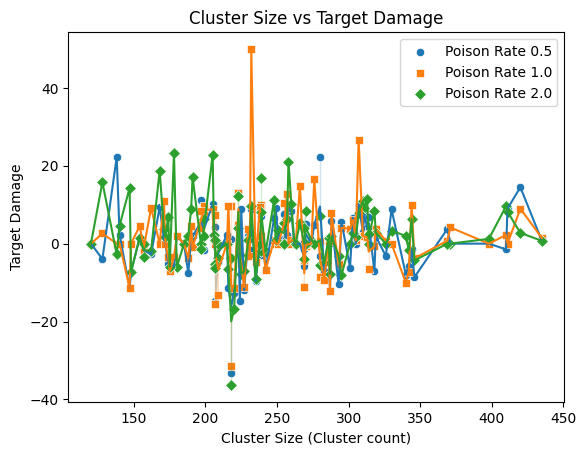

In [61]:
sns.scatterplot(x='Cluster count', y='Target Damage', data=model_5_pr_05, label='Poison Rate 0.5', marker='o')
sns.lineplot(x='Cluster count', y='Target Damage', data=model_5_pr_05)

sns.scatterplot(x='Cluster count', y='Target Damage', data=model_5_pr_1, label='Poison Rate 1.0', marker='s')
sns.lineplot(x='Cluster count', y='Target Damage', data=model_5_pr_1)

sns.scatterplot(x='Cluster count', y='Target Damage', data=model_5_pr_2, label='Poison Rate 2.0', marker='D')
sns.lineplot(x='Cluster count', y='Target Damage', data=model_5_pr_2)

# Add labels and legend
plt.title("Cluster Size vs Target Damage")
plt.xlabel("Cluster Size (Cluster count)")
plt.ylabel("Target Damage")
plt.savefig('visuals/cfr_cluster_size_target_damage.pdf')
plt.show()

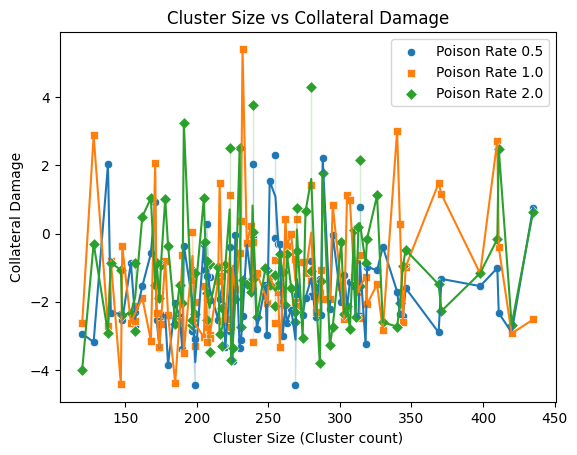

In [62]:
sns.scatterplot(x='Cluster count', y='Collateral Damage', data=model_5_pr_05, label='Poison Rate 0.5', marker='o')
sns.lineplot(x='Cluster count', y='Collateral Damage', data=model_5_pr_05)
sns.scatterplot(x='Cluster count', y='Collateral Damage', data=model_5_pr_1, label='Poison Rate 1.0', marker='s')
sns.lineplot(x='Cluster count', y='Collateral Damage', data=model_5_pr_1)
sns.scatterplot(x='Cluster count', y='Collateral Damage', data=model_5_pr_2, label='Poison Rate 2.0', marker='D')
sns.lineplot(x='Cluster count', y='Collateral Damage', data=model_5_pr_2)
plt.title("Cluster Size vs Collateral Damage")
plt.xlabel("Cluster Size (Cluster count)")
plt.ylabel("Collateral Damage")
plt.savefig('visuals/cfr_cluster_size_collateral_damage.pdf')
plt.show()

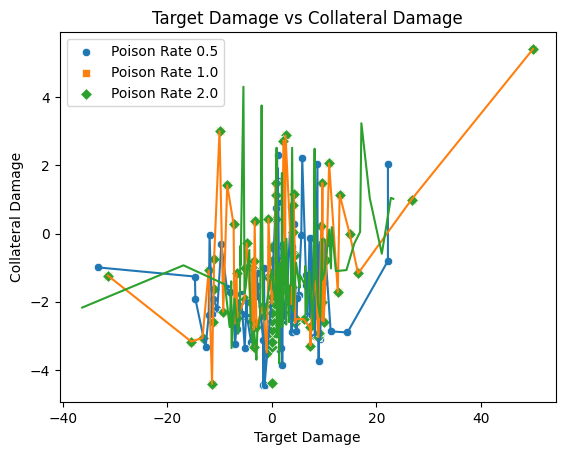

In [63]:
sns.scatterplot(x='Target Damage', y='Collateral Damage', data=model_5_pr_05, label='Poison Rate 0.5', marker='o')
sns.lineplot(x='Target Damage', y='Collateral Damage', data=model_5_pr_05)
sns.scatterplot(x='Target Damage', y='Collateral Damage', data=model_5_pr_1, label='Poison Rate 1.0', marker='s')
sns.lineplot(x='Target Damage', y='Collateral Damage', data=model_5_pr_1)
sns.scatterplot(x='Target Damage', y='Collateral Damage', data=model_5_pr_1, label='Poison Rate 2.0', marker='D')
sns.lineplot(x='Target Damage', y='Collateral Damage', data=model_5_pr_2)
plt.title("Target Damage vs Collateral Damage")
plt.xlabel("Target Damage")
plt.ylabel("Collateral Damage")
plt.savefig('visuals/cfr_target_collateral_damage.pdf')
plt.show()